In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load Data Files

In [2]:
def load_data(file_path: str) -> pd.DataFrame:
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

In [3]:
# Anime datasets
anime_raw = load_data('../data/raw/anime-dataset-2025-2.csv')
anime_filtered = load_data('../data/clean/anime-dataset-filtered.csv')

# watch score datasets
watch_raw_23 = load_data('../data/raw/users-score-2023.csv')
watch_raw_25 = load_data('../data/raw/users-score-2025.csv')
watch_shrunk_23 = load_data('../data/clean/users-score-shrunk-2023.csv')
watch_shrunk_25 = load_data('../data/clean/users-score-shrunk-2025.csv')

Print various watchlist statistics

In [4]:
print("2023 raw vs shrunk smallest anime IDs in raw data:",
      watch_raw_23['anime_id'].min(), watch_shrunk_23['anime_id'].min())
print("2025 raw vs shrunk largest anime IDs in raw data:",
      watch_raw_25['anime_id'].max(), watch_shrunk_25['anime_id'].max())

2023 raw vs shrunk smallest anime IDs in raw data: 1 1
2025 raw vs shrunk largest anime IDs in raw data: 62892 62807


In [5]:
print("2023 Dataset - Unique users:", watch_shrunk_23['user_id'].nunique(), "in total of", len(watch_shrunk_23), "entries")
print("2025 Dataset - Unique users:", watch_shrunk_25['user_id'].nunique(), "in total of", len(watch_shrunk_25), "entries")

2023 Dataset - Unique users: 10974 in total of 2494782 entries
2025 Dataset - Unique users: 10974 in total of 3624939 entries


User Rating Metrics

In [11]:
# Print the means of the scores
print("2023 Dataset - Mean score:", watch_shrunk_23['rating'].mean())
print("2025 Dataset - Mean score:", watch_shrunk_25['rating'].mean())

2023 Dataset - Mean score: 7.566538479113606
2025 Dataset - Mean score: 7.515030183956199


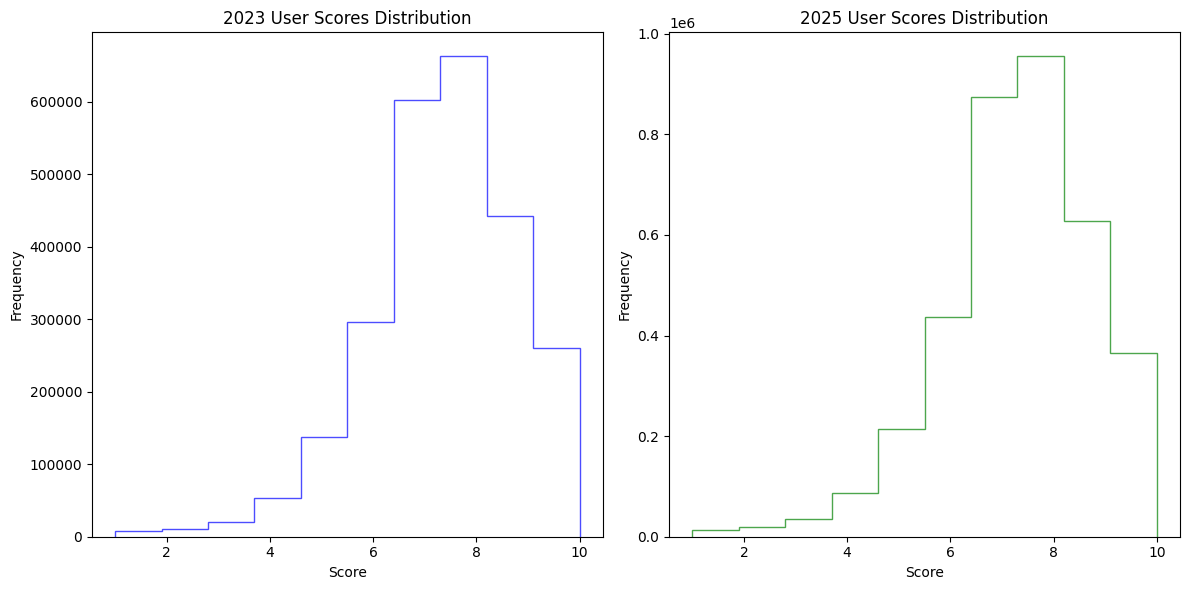

In [10]:
# Plotting histograms of user scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(watch_shrunk_23['rating'], bins=10, color='blue', alpha=0.7, histtype='step')
plt.title('2023 User Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(watch_shrunk_25['rating'], bins=10, color='green', alpha=0.7, histtype='step')
plt.title('2025 User Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Quality Metric Parameter Statistics

In [ ]:
def generate_list(series: pd.Series) -> list:
    """Generate a list of unique items from a pandas Series of comma-separated strings."""
    unique_items = set()
    for entry in series.dropna():
        items = [item.strip() for item in entry.split(',')]
        unique_items.update(items)
    return sorted(unique_items)

In [ ]:
genres_raw, genres_filtered = generate_list(anime_raw['Genres']), generate_list(anime_filtered['Genres'])
print("Number of unique genres in anime datasets: (raw, filtered)", len(genres_raw), len(genres_filtered))
print("List of unique genres in filtered raw dataset:", genres_raw)
print("List of unique genres in filtered anime dataset:", genres_filtered)


Number of unique genres in anime datasets: (raw, filtered) 21 21
List of unique genres in filtered raw dataset: ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']
List of unique genres in filtered anime dataset: ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']


In [ ]:
explicit_genres_raw, explicit_genres_filtered = generate_list(anime_raw['Explicit Genres']), generate_list(anime_filtered['Explicit Genres'])
print("Number of unique explicit genres in anime datasets: (raw, filtered)", len(explicit_genres_raw), len(explicit_genres_filtered))
print("List of unique explicit genres in raw dataset:", explicit_genres_raw)
print("List of unique explicit genres in filtered anime dataset:", explicit_genres_filtered)

Number of unique explicit genres in anime datasets: (raw, filtered) 0 0
List of unique explicit genres in raw dataset: []
List of unique explicit genres in filtered anime dataset: []


In [ ]:
themes_raw, themes_filtered = generate_list(anime_raw['Themes']), generate_list(anime_filtered['Themes'])
print("Number of unique themes in anime datasets: (raw, filtered)", len(themes_raw), len(themes_filtered))
print("List of unique themes in filtered raw dataset:", themes_raw)
print("List of unique themes in filtered anime dataset:", themes_filtered)

Number of unique themes in anime datasets: (raw, filtered) 52 52
List of unique themes in filtered raw dataset: ['Adult Cast', 'Anthropomorphic', 'CGDCT', 'Childcare', 'Combat Sports', 'Crossdressing', 'Delinquents', 'Detective', 'Educational', 'Gag Humor', 'Gore', 'Harem', 'High Stakes Game', 'Historical', 'Idols (Female)', 'Idols (Male)', 'Isekai', 'Iyashikei', 'Love Polygon', 'Love Status Quo', 'Magical Sex Shift', 'Mahou Shoujo', 'Martial Arts', 'Mecha', 'Medical', 'Military', 'Music', 'Mythology', 'Organized Crime', 'Otaku Culture', 'Parody', 'Performing Arts', 'Pets', 'Psychological', 'Racing', 'Reincarnation', 'Reverse Harem', 'Samurai', 'School', 'Showbiz', 'Space', 'Strategy Game', 'Super Power', 'Survival', 'Team Sports', 'Time Travel', 'Urban Fantasy', 'Vampire', 'Video Game', 'Villainess', 'Visual Arts', 'Workplace']
List of unique themes in filtered anime dataset: ['Adult Cast', 'Anthropomorphic', 'CGDCT', 'Childcare', 'Combat Sports', 'Crossdressing', 'Delinquents', 'Dete

In [ ]:
demographics_raw, demographics_filtered = generate_list(anime_raw['Demographics']), generate_list(anime_filtered['Demographics'])
print("Number of unique demographics in anime datasets: (raw, filtered)", len(demographics_raw), len(demographics_filtered))
print("List of unique demographics in filtered raw dataset:", demographics_raw)
print("List of unique demographics in filtered anime dataset:", demographics_filtered)

Number of unique demographics in anime datasets: (raw, filtered) 5 5
List of unique demographics in filtered raw dataset: ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen']
List of unique demographics in filtered anime dataset: ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen']


In [ ]:
print(f"Total number of quality metric parameters in raw: {len(genres_raw) + len(explicit_genres_raw) + len(themes_raw) + len(demographics_raw)}")
print(f"Total number of quality metric parameters in filtered: {len(genres_filtered) + len(explicit_genres_filtered) + len(themes_filtered) + len(demographics_filtered)}")

Total number of quality metric parameters in raw: 78
Total number of quality metric parameters in filtered: 78


Plot the grow of watched anime

In [ ]:
watch_count_23 = watch_shrunk_23.groupby('user_id')['anime_id'].nunique()
watch_count_25 = watch_shrunk_25.groupby('user_id')['anime_id'].nunique()

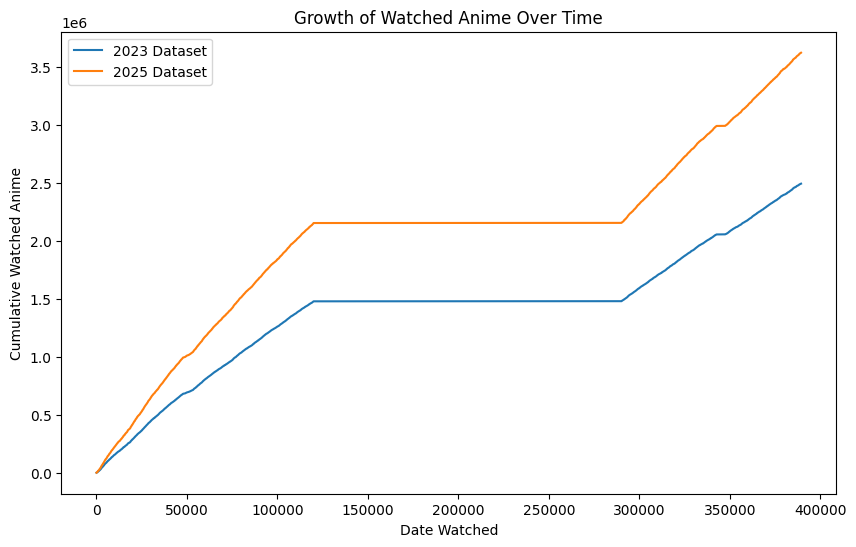

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(watch_shrunk_23.groupby('user_id').size().cumsum(), label='2023 Dataset')
plt.plot(watch_shrunk_25.groupby('user_id').size().cumsum(), label='2025 Dataset')
plt.xlabel('Date Watched')
plt.ylabel('Cumulative Watched Anime')
plt.title('Growth of Watched Anime Over Time')
plt.legend()
plt.show()

In [ ]:
count_23 = watch_shrunk_23['user_id'].value_counts()
count_25 = watch_shrunk_25['user_id'].value_counts()

common_users = count_23.index.intersection(count_25.index)
grown_users = common_users[count_25[common_users] > count_23[common_users]].tolist()

print("Number of users who watched more anime in 2025 than in 2023:", len(grown_users))

Number of users who watched more anime in 2025 than in 2023: 10974


In [ ]:
growth_counts = count_25[grown_users] - count_23[grown_users]
print("Minimum growth in watched anime count:", growth_counts.min())
print("Maximum growth in watched anime count:", growth_counts.max())
print("Average growth in watched anime count:", growth_counts.mean())

Minimum growth in watched anime count: 5
Maximum growth in watched anime count: 593
Average growth in watched anime count: 102.98496446145435


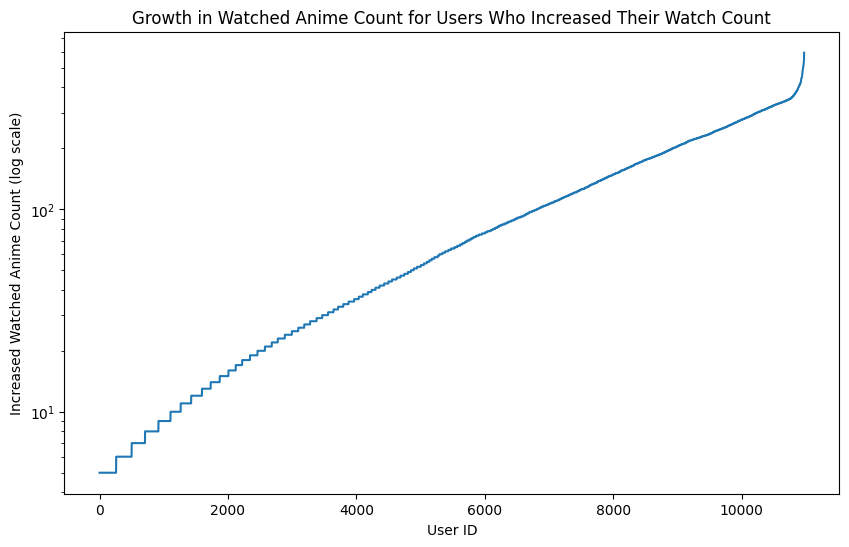

In [ ]:
# Create a plot showing the users growth and their increased anime counts, replacing the user IDs on x-axis with growing numbers, log scale for y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(len(grown_users)), growth_counts.sort_values().values)
plt.yscale('log')
plt.xlabel('User ID')
plt.ylabel('Increased Watched Anime Count (log scale)')
plt.title('Growth in Watched Anime Count for Users Who Increased Their Watch Count')
plt.show()